# Capacitação Vialab # Atividade 5

## Problema de Classificação com dataset Iris
### Data de atualização: 27/01/2022

# Objetivo: Resolver problemas de aprendizagem dos modelos, lidando com overfitting e underfitting

# Exercício de classificação 

Para realizar este exercício vamos usar os dados do dataset iris para treinar as redes neurais. Cada modelo neural está com um problema a de aprendizagem a ser resolvido, overfitting e underfitting. Para resolver esses impasses, vocês precisam encontrar as melhores configurações de hiperparâmetros para que eles possam aprender. Além disso, vocês podem avaliar o desempenho das redes através dos gráficos de accuracy, loss e métricas de classificação.


Que os jogos comecem!! :)

In [ ]:
# Importação dos pacotes e bibliotecas necessárias
from  sklearn import  datasets
from sklearn.model_selection import train_test_split
import keras.layers as kl
import keras # Auxilia na construção de modelo de machine learning e deep learning
from keras import Sequential 
import pandas as pd # Trabalha com a análise de dados
import tensorflow as tf # Plataforma para auxiliar no trabalho com Machine Learning (ML)
import matplotlib.pyplot as plt # Auxilia na apresentação de gráficos e imagens
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np # Auxilia no desenvolvimento de funções matemáticas
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# Carregando o dataset iris
iris = datasets.load_iris()

# O dataset consiste em 50 amostras para ralizar a classificação de 3 tipos diferentes de flores iris. 

In [ ]:
# Verificando os atributos que compõem o dataset
iris.feature_names

In [ ]:
iris.target_names

In [ ]:
# Verificando como os dados estão dispostos
iris.data

In [ ]:
# Armazenando os dados para a previsão em X 
X = iris.data
# Armazenando as respostas (ou target) em y
y = iris.target

In [ ]:
# Verificando o tamanho dos dados
print("Shape of X data:", X.shape)
print("Shape of y data:", y.shape)

##Divisão dos dados

In [ ]:
# Divisão dos dados iris em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#Construção do modelo neural

##A entrada da rede neural deve ter o tamanho 4, já que o conjunto de dados possui 4 variáveis (sepal length, sepal width, petal length, and petal width).

## Para ralizar o treinamento, iremos usar uma rede neural MLP (Multilayer Perceptron). 

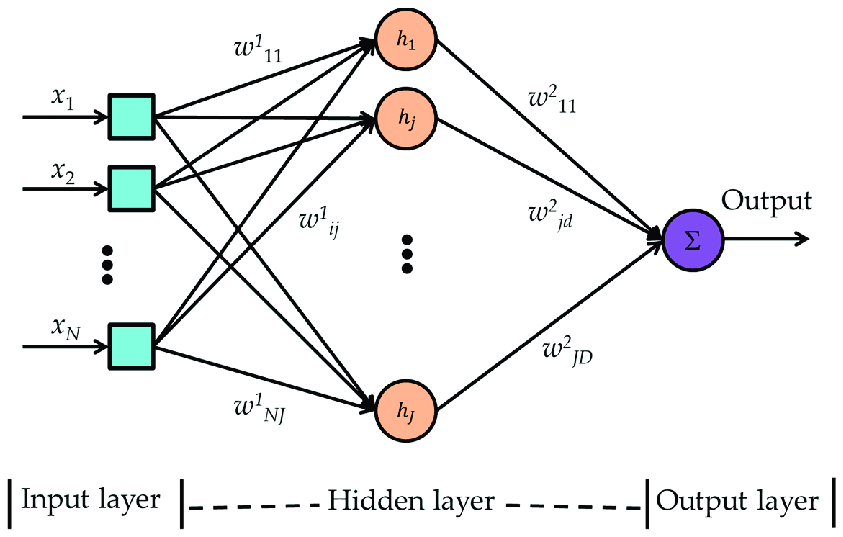

A rede MLP consiste de camadas intermediárias (hidden layers) em sua estrutura, localizadas em as camadas de entrada(input) e saída(output). Dito isso, a rede Multilayer Perceptron consegue realizar a classificação de problemas que possuam mais de duas classes, resolvendo problemas não linearmente separáveis. Além disso, a rede MLP utiliza função de ativação em suas camadas, que auxilia no cálculo de saída do modelo.


# Como ele trabalha?

* Etapa 1: inicializa os pesos e o viés(bias) com pequenos valores aleatórios;
* Etapa 2: Propagar todos os valores na camada de entrada até a camada de saída (Forward Propagation);
* Etapa 3: Atualize o peso e o viés nas camadas internas (Backpropagation);
* Etapa 4: Faça isso até que o critério de parada seja satisfeito(o critério de parada pode ser o número de épocas do treinamento).



#Função de ativação

As funções de ativação decidem se o sinal, ou seja, a informação, deve passar ou não para a próxima camada, ou seja, ela irá verificar qual informação será ou não relevante para o processo de previsão da rede.

In [ ]:
#Construção do modelo
model = Sequential()
model.add(kl.Dense(100, activation='relu', input_shape=(4,)))
model.add(kl.Dense(30, activation='relu'))
model.add(kl.Dense(60, activation='relu'))
model.add(kl.Dense(3, activation='relu'))

In [ ]:
model.summary()

# Configurações do modelo

* Loss: utilizada para medir a performance dos resultados produzidos pelos neurônios de saída e a saída esperada(ground truth).
* Otimizador: Com todos os modelos é feito a diferença do valor Real pelo Predito, os Otimizadores entram na parte de perceber essa diferença e utilizar isso para melhorar a rede.


In [ ]:
# Definindo as configurações do modelo
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics='accuracy')

In [ ]:
#Treinamento do modelo
hist = model.fit(X_train, y_train, epochs= 20,  batch_size=300, verbose=1, validation_split=0.20)
hist

# Por que avaliar a perda(loss)?

O loss é utilizado para verificar a porcentagem de erro da rede neural, podendo ser calculado no treinamento e na validação do modelo. Deste modo podemos verificar o quão bom ou ruim está sendo a previsão da rede após a realização de cada época. Deste modo, o loss terá um valor alto se a classe predita pela rede neural não corresponder a classe verdadeira (ground truth).

In [ ]:
# Gráfico de loss
plt.figure(figsize=(10,8))
plt.title("Gráfico de Loss")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

# Métricas de Classificação 
  As métricas de classificação são utilizadas para dizer se o modelo utilizado para a classificação dos dados  de entrada fez isso corretamente.

*  ACURÁCIA /  ACCURACY

A acurácia exibe a quantidade de dados classificados e quais deles foram categorizados corretamente, ou seja, ela considera apenas o verdadeiros positivos e os verdadeiros negativos. Por exemplo, se a rede neural conseguiu classificar 50 frutas corretamente das 125 frutas que foram analisadas, a acurácia dela foi de 40%. 



O cálculo da acurácia pode ser realizado da seguinte maneira:



(Número de predições corretas / Número total de predições) * (100)


Acurácia = (50/125) * (100)


Acurácia = 40%


Entretanto, a acurácia não é eficiente quando temos um conjunto de dados muito desbalanceados. Por exemplo, se tivermos 1  fruta classificada como “não maçã” e 234 classificadas como “é uma maçã”, a acurácia seria de 99,57%, porém o motivo que faz a acurácia ser tão alta é o fato do nosso conjunto de dados ser desbalanceado. 


In [ ]:
# Gráfico de acurácia
plt.figure(figsize=(10,8))
plt.title("Gráfico de Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
#Realizando a predição do modelo
pred = np.argmax(model.predict(X_test), axis=1)

* MATRIZ DE CONFUSÃO


A matriz de confusão permite a visualização dos dados que foram classificados de forma correta ou errada e se uma classe está sendo mais beneficiada do que outra, levando em consideração a análise dos valores preditos e dos valores verdadeiros. Ela permite a observação da quantidade de registros analisados e a segmentação desses registros em quatro classes: falso positivo (FP), falso negativo (FN), verdadeiro positivo (TP) e verdadeiro negativo (TN).


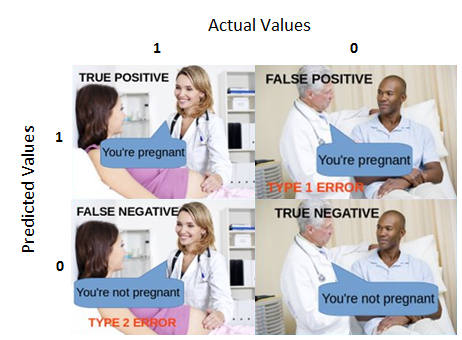


In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Iris Setosa', 'Iris Virginica', 'Iris versicolor'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Matriz de confusão')
cmd.plot(ax = ax,cmap='Blues_r')

* PRECISÃO / PRECISION


A precisão também pode ser utilizada para avaliar os modelos de classificação. Ela pode ser empregada na análise dos dados que foram previstos como verdadeiros positivos e falsos positivos, dando ênfase ao custo dos dados classificados como falsos positivos.

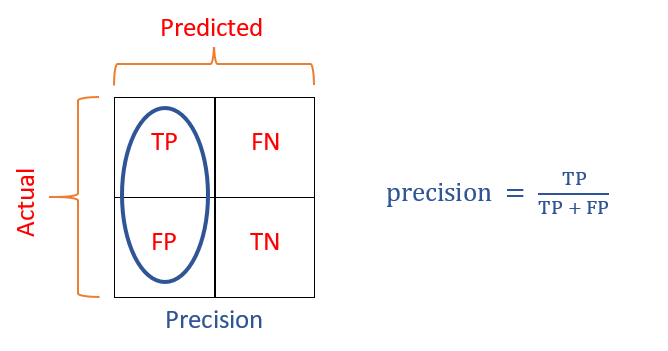


In [ ]:
print('Precison:', precision_score(y_test, pred, average='micro'))

* REVOCAÇÃO /  RECALL  /  SENSIBILITY


O recall visa analisar  os dados previstos como verdadeiros positivos e os falsos negativos, com o objetivo de verificar a amostra positiva real dos dados analisados, ou seja, qual porcentagem analisada corretamente. 


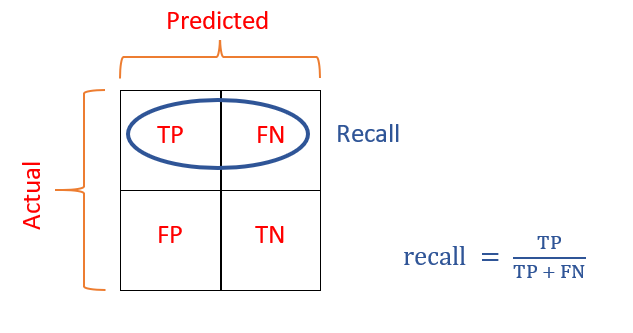

In [ ]:
print('Recall:', recall_score(y_test, pred, average='micro'))

* SCORE F1 / F1 SCORE / F-MEASURE / PONTUAÇÃO F1


A score F1 leva em consideração a combinação das medidas de  precisão e de  evocação, de forma a calcular uma média  harmônica entre os dois parâmetros e realizar a comparação deles. O F1 score é uma boa medida para calcular o balanceamento entre o precision e o recall. Os resultados podem variar de 0 a 1, sendo 0 um resultado ruim e quanto mais próximo de 1, melhor será o resultado .


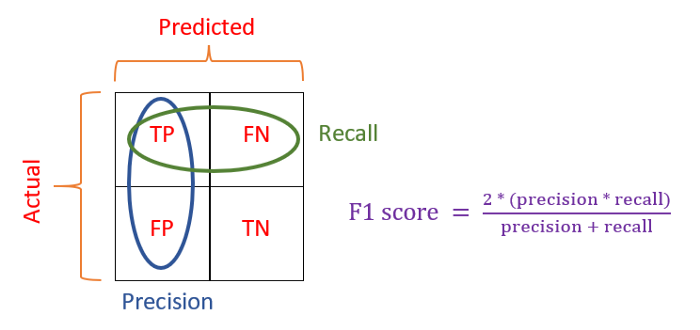

In [ ]:
print('F1 Score:', f1_score(y_test, pred, average='micro'))

In [ ]:
#Construção do modelo
model2 = Sequential()
model2.add(kl.Dense(20, activation='relu', input_shape=(4,)))
model2.add(kl.Dense(5, activation='tanh'))
model2.add(kl.Dense(3, activation='relu'))

In [ ]:
model.summary()

In [ ]:
# Definindo as configurações do modelo
model2.compile(loss='binary_crossentropy', optimizer='adamax', metrics='accuracy')

In [ ]:
#Treinamento do modelo
hist2 = model2.fit(X_train, y_train, epochs= 40,  batch_size=300, verbose=1, validation_split=0.20)
hist2

In [ ]:
# Gráfico de loss
plt.figure(figsize=(10,8))
plt.title("Gráfico de Loss")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist2.history['loss'], label="loss")
plt.plot(hist2.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [ ]:
# Gráfico de acurácia
plt.figure(figsize=(10,8))
plt.title("Gráfico de Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist2.history['accuracy'], label="accuracy")
plt.plot(hist2.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
#Realizando a predição do modelo
pred2 = np.argmax(model2.predict(X_test), axis=1)

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, pred2)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Iris Setosa', 'Iris Virginica', 'Iris versicolor'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Matriz de confusão')
cmd.plot(ax = ax,cmap='Blues_r')

In [ ]:
print('Precison:', precision_score(y_test, pred2, average='micro'))

In [ ]:
print('Recall:', recall_score(y_test, pred2, average='micro'))

In [ ]:
print('F1 Score:', f1_score(y_test, pred2, average='micro'))

# O que é Overfitting?

O Overfitting ocorre quando o desempenho do modelo é bom nos dados de treino, mas piora no teste, ou seja, a rede acabou por decorar as relações existentes nos dados e não conseguiu generalizar.

# O que é Underfitting?

Quando o desempenho do modelo é perceptivelmente ruim já no treinamento. O modelo não consegue encontrar relações entre as variáveis.

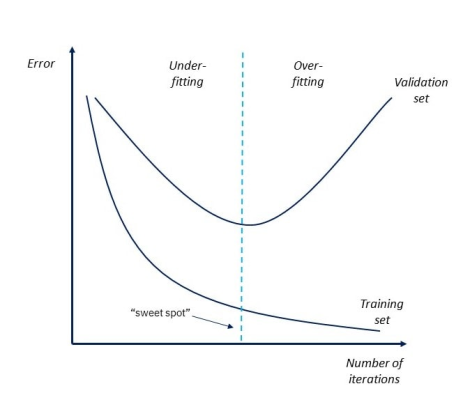

#Como encontrar os melhores parâmetros?

Para encontrar os melhores parâmetros da rede neural é necessário a realização de diversos testes e treinos da rede, modificando funções de ativação e quantidade de neurônios por camada.

#Por que é importante realizar testes com diferentes configurações?

Os testes são importantes para aulixiar na seleção da melhor configuração da rede, ou seja, a configuração com melhor acurácia.



# Como melhorar a performance da I.A?

Quando se tem uma Inteligência Artificial feita por um determinado algoritmo, no final, após as fases de treinamento, validação e teste, essa I.A pode apresentar resultados não satisfatórios. Contudo, existem dois jeitos de reparar esses erros: Através de dados e através de algoritmo.


## * Melhorar através de dados:


Esta maneira consiste em simplesmente reforçar o treinamento da I.A com mais dados. Pois quanto mais dados de treinamento se tem, maior a probabilidade de um melhor desempenho. Em outras palavras, quanto mais dados ele aprende, mais casos a máquina é capaz de classificar corretamente.


## * Melhorar através de algoritmo


A maneira através de algoritmo consiste na mudança de algoritmo para conferir se algum algoritmo diferente consegue aprender e lidar melhor com a base de dados fornecidas.


Referências 

https://www.kaggle.com/vitorgamalemos/multilayer-perceptron-from-scratch?scriptVersionId=79241565

https://medium.com/computing-science/using-multilayer-perceptron-in-classification-problems-iris-flower-6fc9fbf36040

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198


https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

https://www.linkedin.com/pulse/why-do-we-need-data-splitting-utkarsh-sharma/

https://medium.com/@AI_with_Kain/understanding-of-multilayer-perceptron-mlp-8f179c4a135f

https://deepai.org/machine-learning-glossary-and-terms/multilayer-perceptron

https://didatica.tech/underfitting-e-overfitting/
